In [2]:
from __future__ import division
import numpy as np
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm,datasets
import os
import itertools
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
os.chdir('/home/harsh/Desktop/Harsh_Deshpande/Readable_Data')

In [ ]:
s_slopes = []
t_slopes = []
r_slopes = []
p_slopes = []

f = open ('shannon_slopes.txt','r')
for line in f:
    for word in line.split():
        s_slopes.append(float(word))
f.close()

f = open ('tsallis_slopes.txt','r')
for line in f:
    for word in line.split():
        t_slopes.append(float(word))
f.close()

f = open ('renyi_slopes.txt','r')
for line in f:
    for word in line.split():
        r_slopes.append(float(word))
f.close()

f = open ('permutation_slopes.txt','r')
for line in f:
    for word in line.split():
        p_slopes.append(float(word))
f.close()

means = []
means.append(np.average(s_slopes))
means.append(np.average(t_slopes))
means.append(np.average(r_slopes))
means.append(np.average(p_slopes))

std = []
std.append(np.std(s_slopes))
std.append(np.std(t_slopes))
std.append(np.std(r_slopes))
std.append(np.std(p_slopes))

print (means)
print (std)

In [ ]:
n = 4
b = 0.35
fig , ax = plt.subplots()
index = np.arange(n)
opacity = 0.5
error_config = {'ecolor':'0.0'}
rects1 = ax.bar (index, means, b, alpha=opacity, color='b', yerr=(0,0,0,0), error_kw=error_config,label='Mean')
rects1 = ax.bar (index+b, std, b, alpha=opacity, color='r', yerr=(0,0,0,0), error_kw=error_config,label='Standard Deviation')
ax.set_xlabel('Entropy')
ax.set_ylabel('Value')
ax.set_title('Mean slopes and std_deviation')
ax.set_xticks(index + b/2)
ax.set_xticklabels(('Shannon','Tsallis','Renyi','Permutation'))
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
n_groups = 4



fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
f = open('renyi_slopes_var.txt','r')
r_slopes = []
for line in f:
    #print (line.split()[0].split('[')[1].split(',')[0])
    try:
        r_slopes.append(float(line.split()[0].split('[')[1].split(',')[0]))
    except:
        pass
print (len(r_slopes))  

[625.   0.   0.   0.   0.] [1.00000000e+00 1.30656296e+01 3.49355339e+02 2.91363541e+03
 3.80279048e+04 1.92299937e+05 1.52179186e+06 3.75631626e+06
 1.89747360e+07]


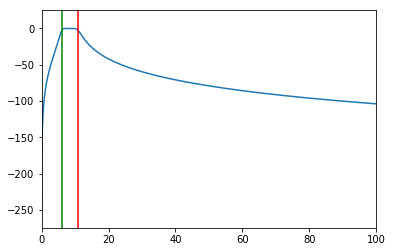

In [8]:
b, a = signal.butter(4, (6,11), 'band', analog=True)
print (b,a)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.margins(0, 0.1)
plt.axvline(6, color='green')
plt.axvline(11, color='red')
plt.show()

In [3]:
from scipy import signal

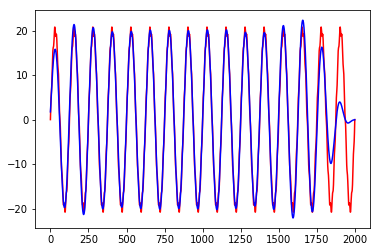

In [36]:
sig = []
f = 8
f1 = 80
fs = 1000
r = fs/2
cut = [6/r,11/r]
b, a = signal.butter(4, cut, 'band')
for t in range (0,2001):
    sig.append (20*np.sin (2*np.pi*f*t/1000) + np.sin(2*np.pi*f1*t/1000))
out = signal.filtfilt(b,a,sig)
plt.plot(sig,'r')
plt.plot(out,'b')